In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cuqi
import cuqipy_cil


In [2]:

# Load a CT forward model and data from testproblem library
A, y_data, info = cuqipy_cil.testproblem.ParallelBeam2D(
    im_size=(128, 128),
    det_count=128,
    angles=np.linspace(0, np.pi, 180),
    phantom="shepp-logan"
).get_components()

# Set up Bayesian model
x = cuqi.distribution.Gaussian(np.zeros(A.domain_dim), cov=1) # x ~ N(0, 1)
y = cuqi.distribution.Gaussian(A@x, cov=0.05**2)              # y ~ N(Ax, 0.05^2)

# Set up Bayesian Problem
BP = cuqi.problem.BayesianProblem(y, x).set_data(y=y_data)

# Sample from the posterior
samples = BP.sample_posterior(200)


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is a work-in-progress. !!!
!!!       Always validate the computed results.        !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using cuqi.sampler LinearRTO sampler.
burn-in: 20%
Sample 240 / 240
Elapsed time: 279.9474141597748


Text(0.5, 1.0, 'Exact solution')

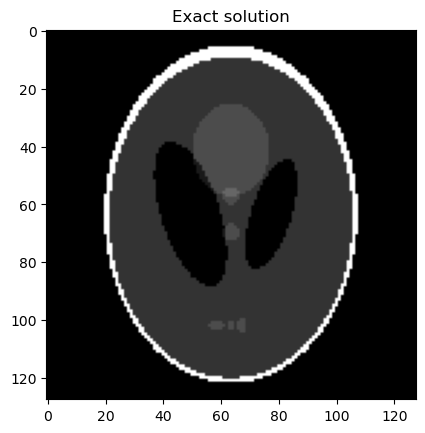

In [3]:

# Analyze the samples
info.exactSolution.plot(); plt.title("Exact solution")


Text(0.5, 1.0, 'Data')

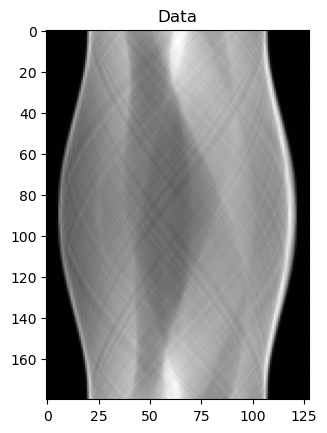

In [4]:

y_data.plot(); plt.title("Data")


Text(0.5, 1.0, 'Posterior mean')

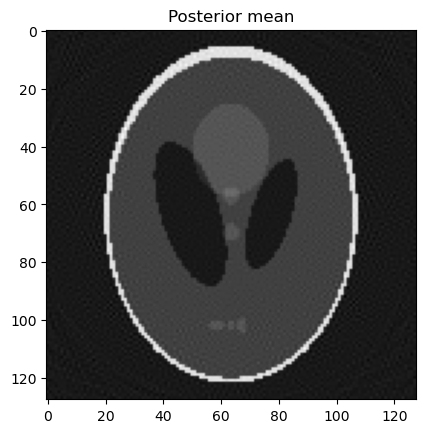

In [5]:

samples.plot_mean(); plt.title("Posterior mean")


Text(0.5, 1.0, 'Posterior standard deviation')

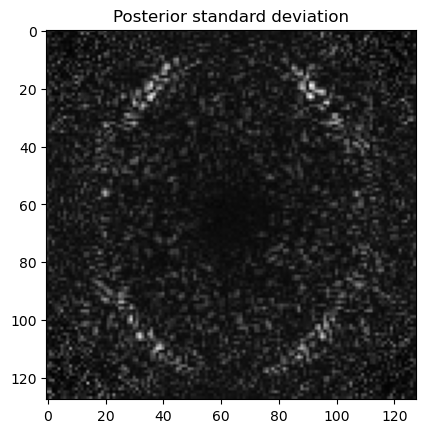

In [6]:
samples.plot_std(); plt.title("Posterior standard deviation")